In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn import tree
import cv2

import pickle

In [83]:
# load x_train, x_test, y_train, y_test

X_train = np.loadtxt(f"X_train_add_one_bit")
# # X_train = X_train_reshaped.reshape(X_train_reshaped.shape[0], X_train_reshaped.shape[1] // 45, 45)

X_test = np.loadtxt(f"X_test_add_one_bit")
# X_test = X_test_reshaped.reshape(X_test_reshaped.shape[0], X_test_reshaped.shape[1] // 45, 45)

y_train = np.loadtxt(f"y_train_add")
y_test = np.loadtxt(f"y_test_add")

In [84]:
print(X_train[0])
print(X_train.shape) # (10000, 2025) ==> (10000, 45, 45) ==> (10000, 2025)
print(X_test[0])
print(y_train[0])
print(y_test[0])


[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
6.0
12.0


In [ ]:
# X_train_onebit = X_train.astype(int) / 255
# X_test_onebit = X_test.astype(int) / 255

# np.save("X_train_add_one_bit", X_train_onebit)
# np.save("X_test_add_one_bit", X_train_onebit)

In [3]:
# X_train = X_train_onebit
# X_test = X_test_onebit

In [ ]:
# X_train = np.loadtxt(f"X_train_add_one_bit")
# # X_train = X_train_reshaped.reshape(X_train_reshaped.shape[0], X_train_reshaped.shape[1] // 45, 45)

# X_test = np.loadtxt(f"X_test_add_one_bit")
# X_test = X_test_reshaped.reshape(X_test_reshaped.shape[0], X_test_reshaped.shape[1] // 45, 45)


In [3]:
# fit decision tree model
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [85]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train) # samples x features
# Pipeline(steps=[('standardscaler', StandardScaler()),('svc', SVC(gamma='auto'))])


: 

In [ ]:
# save the model
filename = 'SVC_v1.sav'
pickle.dump(clf, open(filename, 'wb'))

In [4]:
# load the model
filename = 'dt_model.sav'
loaded_model = pickle.load(open(filename, "rb"))

In [81]:
print(loaded_model.tree_.max_depth)

66


In [5]:
#test the accuracy
predicted = dt_classifier.predict(X_test)
accuracy = (len(X_test[predicted == y_test]) / len(X_test)) * 100
print("accuracy: ", accuracy)

accuracy:  99.34921708014942


In [5]:
# category index

categories = {"0", "1", "2", "3", "4", "5", "6", "7", "8", "9",
              "=", "(", ")",
              "forall", "exists",
              "int", "log",
              "X", "y", 'z',
              "+", "-", "pi"}

category_index = {
    "0" : 0, "1" : 1, "2" : 2, "3" : 3, "4" : 4, "5" : 5, "6" : 6, "7" : 7, "8" : 8, "9" : 9,
    "=" : 10, "(" : 11, ")" : 12, "forall" : 13, "exists" : 14,
    "int" : 15, "log" : 16,
    "X" : 17, "y" : 18, "z" : 19, "+" : 20, "-" : 21, "pi" : 22
}

reverse_category_index = {v : k for k, v in category_index.items()}

In [ ]:
def predict(filepath, model):

    img = cv2.imread(filepath)[:,:,0]
    img = np.array([img])

    arr_reshaped = img.reshape(1, 2025)

    prediction = model.predict(arr_reshaped)
    print(prediction)
    print("Prediction: ", reverse_category_index[int(prediction[0])])

    plt.imshow(255 - img[0],cmap=plt.cm.binary)
    plt.show()

[13.]
Prediction:  forall


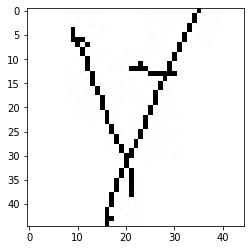

In [ ]:
filepath = "/Users/maxko/Documents/D. Personal Project/Summer2023/neuralnet/extracted_images/forall/exp2478.jpg"
model = dt_classifier
predict(filepath, model)

In [7]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train_kera, y_train_kera),(x_test_kera, y_test_kera) = mnist.load_data()

In [9]:
print(X_train[0])

[1. 1. 1. ... 1. 1. 1.]


In [73]:
from skimage.transform import resize


img = resize(x_train_kera, (60000, 45, 45))
print(img.shape)
arr_reshaped = 1 - img.reshape(60000, 2025)

print(arr_reshaped.shape)

# print(arr_onebit)

best_accuracy = 0
best_threshold = None

# for i in range(0, 100, 5):
#     transformed = np.where(arr_reshaped > (i / 100) + 0.4, 1, 0)

#     # np.savetxt('arr_int.txt', arr_int)

#     prediction = dt_classifier.predict(transformed)
#     accuracy = (len(x_train_kera[prediction == y_train_kera]) / len(x_train_kera)) * 100

#     print(i, accuracy)

#     if (accuracy > best_accuracy):
#         best_accuracy = accuracy
#         best_threshold = i

# print("Best accuracy: ", best_accuracy)
# print("Best threshold: ", best_threshold)

(60000, 45, 45)
(60000, 2025)


[1. 1. 1. ... 1. 1. 1.]
(2025,)
1.000000    1355
0.015686      17
0.015686       9
0.418388       5
0.877124       5
            ... 
0.991307       1
0.991460       1
0.968686       1
0.829558       1
0.998635       1
Length: 608, dtype: int64
[1. 1. 1. ... 1. 1. 1.]
1.0    1726
0.0     299
dtype: int64
[4.]
Prediction:  4


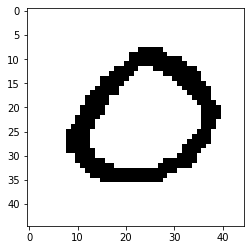

In [80]:
test_img = arr_reshaped[435]

print(test_img)
print(test_img.shape)

series = pd.Series(test_img)
counts = series.value_counts()
print(counts)

transformed = np.where(test_img >= 0.300, 1.0, 0.0)

print(transformed)
series = pd.Series(transformed)
counts = series.value_counts()
print(counts)

# test_img = transformed
# print("img shape should be (1, 45, 45)")
# print(test_img.shape)

# arr_reshaped = test_img.reshape(1, 2025)
# print("img reshape should be (1, 2025)")
# print(test_img.shape)

prediction = loaded_model.predict(np.array([transformed]))

print(prediction)
print("Prediction: ", reverse_category_index[int(prediction[0])])

plt.imshow(1 - transformed.reshape(45, 45),cmap=plt.cm.binary)
plt.show()

# prediction = dt_classifier.predict(test_img)

# print("Prediction: ", reverse_category_index[int(prediction[0])])

(1000, 1000)


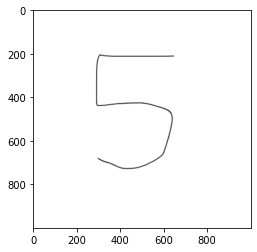

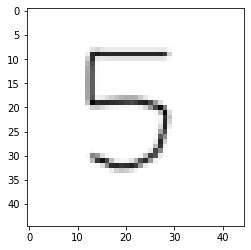

1.000000    1665
1.000000      12
0.995269       5
0.965472       5
0.996620       4
            ... 
0.999933       1
0.999958       1
0.999974       1
0.999991       1
1.000000       1
Length: 333, dtype: int64
[[1. 1. 1. ... 1. 1. 1.]]
1.0    1962
0.0      63
dtype: int64
img shape should be (1, 45, 45)
(1, 2025)
img reshape should be (1, 2025)
(1, 2025)
[2.]
Prediction:  2


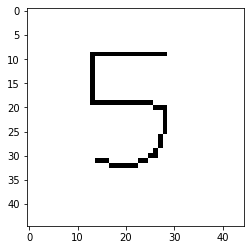

In [56]:
filepath = "/Users/maxko/Documents/D. Personal Project/Summer2023/neuralnet/scribbletex-4.png"
img = cv2.imread(filepath)[:,:,0]

print(img.shape)

plt.imshow(1 - img,cmap=plt.cm.binary)
plt.show()

resized = resize(img, (45, 45))

plt.imshow(1 - resized,cmap=plt.cm.binary)
plt.show()

arr_reshaped = resized.reshape(1, 2025)

series = pd.Series(arr_reshaped[0])
counts = series.value_counts()
print(counts)

transformed = np.where(arr_reshaped >= 0.980, 1.0, 0.0)

print(transformed)
series = pd.Series(transformed[0])
counts = series.value_counts()
print(counts)

img = transformed
print("img shape should be (1, 45, 45)")
print(img.shape)

arr_reshaped = img.reshape(1, 2025)
print("img reshape should be (1, 2025)")
print(img.shape)

prediction = loaded_model.predict(arr_reshaped)

print(prediction)
print("Prediction: ", reverse_category_index[int(prediction[0])])

plt.imshow(1 - transformed[0].reshape(45, 45),cmap=plt.cm.binary)
plt.show()

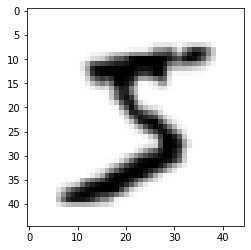

In [11]:
plt.imshow(img[0],cmap=plt.cm.binary)
plt.show()